### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
import plotly.express as px

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split,StratifiedKFold

### Loading Datasets

In [2]:
train = pd.read_csv("/kaggle/input/hack-the-vibe/dataset/train.csv")
test = pd.read_csv("/kaggle/input/hack-the-vibe/dataset/test.csv")
sub =pd.read_csv("/kaggle/input/hack-the-vibe/dataset/sample_submission.csv")

In [4]:
train.head()

,id,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_5470,var_5471,var_5472,var_5473,var_5474,var_5475,var_5476,var_5477,var_5478,target
0,id_1,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.355422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,id_2,0.187500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.150602,...,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0
2,id_3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,0.008333,NaN,NaN,0.0,NaN,NaN,0.0,0
3,id_4,0.156250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,id_5,0.046875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
sub.head()

,id,predicted,predicted_probability
0,id_1,0,0.07
1,id_2,0,0.36
2,id_3,0,0.27
3,id_4,0,0.26
4,id_5,1,0.60


In [6]:
test.head()

,id,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_5469,var_5470,var_5471,var_5472,var_5473,var_5474,var_5475,var_5476,var_5477,var_5478
0,id_1,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,...,NaN,0.035714,NaN,0.0125,NaN,NaN,NaN,NaN,NaN,NaN
1,id_2,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,id_3,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,id_4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,id_5,0.046875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
test.isnull().sum()

id             0
var_1        408
var_2        408
var_3        408
var_4        408
            ... 
var_5474    4782
var_5475    4786
var_5476    4866
var_5477    4999
var_5478    4498
Length: 5479, dtype: int64

In [8]:
test.shape

(5000, 5479)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 5480 entries, id to target
dtypes: float64(5478), int64(1), object(1)
memory usage: 1.0+ GB


In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
var_1,22876.0,0.047580,0.073311,0.0,0.0,0.015625,0.062500,1.0
var_2,22876.0,0.000962,0.017310,0.0,0.0,0.000000,0.000000,1.0
var_3,22876.0,0.000393,0.013400,0.0,0.0,0.000000,0.000000,1.0
var_4,22876.0,0.000437,0.020904,0.0,0.0,0.000000,0.000000,1.0
var_5,22876.0,0.000262,0.013221,0.0,0.0,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...
var_5475,1026.0,0.026578,0.062204,0.0,0.0,0.000000,0.038462,1.0
var_5476,789.0,0.048247,0.099965,0.0,0.0,0.000000,0.066667,1.0
var_5477,7.0,0.178571,0.374007,0.0,0.0,0.000000,0.125000,1.0
var_5478,2570.0,0.012042,0.032418,0.0,0.0,0.000000,0.008621,1.0


In [11]:
train.nunique().sort_values()

var_1587        0
var_2497        0
var_2498        0
var_2499        0
var_2500        0
            ...  
var_4174    24052
var_5115    24056
var_5059    24058
var_5398    24067
id          25000
Length: 5480, dtype: int64

### Data Preprocessing and feature engineering

In [12]:
train1 = train.copy()
train1=train1.drop('target',axis=1)

In [13]:
nans=train1.isnull().sum()

In [14]:
nans

id              0
var_1        2124
var_2        2124
var_3        2124
var_4        2124
            ...  
var_5474    23896
var_5475    23974
var_5476    24211
var_5477    24993
var_5478    22430
Length: 5479, dtype: int64

In [15]:
nans.mean()

11541.113889395876

In [16]:
nans.median()

7151.0

In [17]:
quant=nans.quantile(q=0.75)
quant

23189.0

In [18]:
(nans.values>=quant).sum()

1377

* Drop 1377 columns as their count of NaNs are greater than 0.75 quantile

In [19]:
to_keep1 = nans.values<quant

In [20]:
train1=train1.loc[:,nans.values<quant]

In [21]:
train1.shape

(25000, 4102)

In [22]:
train1.nunique().sort_values()

var_1536        1
var_3403        1
var_3402        1
var_3401        1
var_3400        1
            ...  
var_4174    24052
var_5115    24056
var_5059    24058
var_5398    24067
id          25000
Length: 4102, dtype: int64

In [23]:
(train1.nunique()==1).sum()

2277

In [24]:
to_keep2 = train1.nunique()>1

In [25]:
train1=train1.loc[:,train1.nunique()>1]

* Keep the features whose number of unique values is greater than 1

In [26]:
train1=train1.drop(columns=['id'],axis=1)
train1.head()

,var_1,var_2,var_3,var_4,var_5,var_7,var_8,var_9,var_10,var_12,...,var_5462,var_5463,var_5464,var_5466,var_5467,var_5468,var_5469,var_5470,var_5472,var_5478
0,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.355422,0.106633,NaN,...,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,0.187500,0.0,0.0,0.0,0.0,0.0,0.0,0.150602,0.106633,NaN,...,0.067114,0.049020,0.073684,0.062992,NaN,NaN,NaN,0.0,0.000000,NaN
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,0.020134,0.068627,NaN,0.036745,NaN,NaN,0.052632,NaN,0.008333,0.0
3,0.156250,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,0.106633,NaN,...,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
4,0.046875,0.0,0.0,0.0,0.0,0.0,0.0,0.096386,0.106633,NaN,...,NaN,0.009804,NaN,0.005249,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
so=train1.nunique().sort_values()

In [28]:
type(so)

pandas.core.series.Series

<AxesSubplot:>

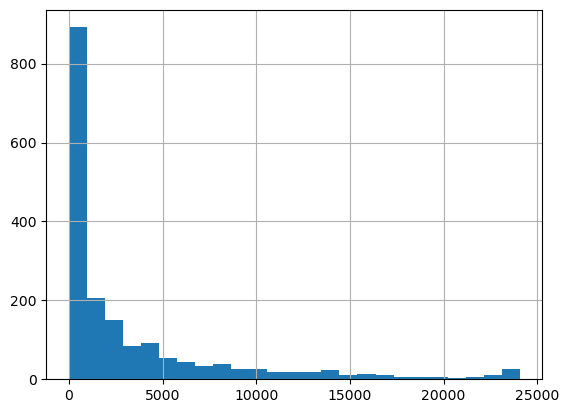

In [29]:
so.hist(bins=25)

In [30]:
(train1.nunique()<1000).sum()

903

In [32]:
train1.mean()

var_1       0.047580
var_2       0.000962
var_3       0.000393
var_4       0.000437
var_5       0.000262
              ...   
var_5468    0.012645
var_5469    0.027284
var_5470    0.020516
var_5472    0.010233
var_5478    0.012042
Length: 1824, dtype: float64

In [33]:
train1=train1.fillna(train1.mean())

* Fill the NaNs with mean

In [35]:
train1.isnull().sum()

var_1       0
var_2       0
var_3       0
var_4       0
var_5       0
           ..
var_5468    0
var_5469    0
var_5470    0
var_5472    0
var_5478    0
Length: 1824, dtype: int64

In [36]:
train1.describe().sort_values('max',axis=1,ascending=False).T

,count,mean,std,min,25%,50%,75%,max
var_5213,25000.0,inf,NaN,0.0,0.000631,NaN,NaN,inf
var_1,25000.0,0.047580,0.070128,0.0,0.000000,0.031250,0.062500,1.0
var_4269,25000.0,0.025208,0.037915,0.0,0.006872,0.021190,0.025208,1.0
var_4282,25000.0,0.018030,0.016752,0.0,0.018030,0.018030,0.018030,1.0
var_4281,25000.0,0.013233,0.014671,0.0,0.010584,0.013233,0.013233,1.0
...,...,...,...,...,...,...,...,...
var_1448,25000.0,0.168757,0.082806,0.0,0.115000,0.115000,0.187500,1.0
var_1447,25000.0,0.043598,0.021955,0.0,0.037101,0.037101,0.042436,1.0
var_1446,25000.0,0.073305,0.024034,0.0,0.061121,0.065984,0.073999,1.0
var_1445,25000.0,0.011993,0.029642,0.0,0.001085,0.004034,0.011993,1.0


In [37]:
np.isfinite(train1['var_5213']).sum()

12400

In [38]:
train1['var_5213']

0             inf
1        0.001033
2             inf
3             inf
4             inf
           ...   
24995    0.005426
24996    0.001411
24997    0.000562
24998    0.000782
24999         inf
Name: var_5213, Length: 25000, dtype: float64

In [39]:
train1 = train1.drop(columns=['var_5213'],axis=1)

* Feature 'var_5213' is dropped as it contains several inf 

In [40]:
train1.head()

,var_1,var_2,var_3,var_4,var_5,var_7,var_8,var_9,var_10,var_12,...,var_5462,var_5463,var_5464,var_5466,var_5467,var_5468,var_5469,var_5470,var_5472,var_5478
0,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.355422,0.106633,0.045097,...,0.020902,0.000000,0.034038,0.000000,0.018391,0.012645,0.027284,0.020516,0.010233,0.012042
1,0.187500,0.0,0.0,0.0,0.0,0.0,0.0,0.150602,0.106633,0.045097,...,0.067114,0.049020,0.073684,0.062992,0.018391,0.012645,0.027284,0.000000,0.000000,0.012042
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.072058,0.109653,0.045097,...,0.020134,0.068627,0.034038,0.036745,0.018391,0.012645,0.052632,0.020516,0.008333,0.000000
3,0.156250,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,0.106633,0.045097,...,0.000000,0.029584,0.034038,0.000000,0.018391,0.012645,0.027284,0.020516,0.010233,0.012042
4,0.046875,0.0,0.0,0.0,0.0,0.0,0.0,0.096386,0.106633,0.045097,...,0.020902,0.009804,0.034038,0.005249,0.018391,0.012645,0.027284,0.020516,0.010233,0.012042


In [41]:
np.any(np.isnan(train1))

False

In [42]:
np.all(np.isfinite(train1))

True

### Modelling

In [43]:
def plot_feature_importance(importance,names,model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df1=fi_df[0:20]
    plt.figure(figsize=(10,8))
  
    sns.barplot(x=fi_df1['feature_importance'], y=fi_df1['feature_names'])
    
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [44]:
test1=test.copy()

In [45]:
test1.head()

,id,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_5469,var_5470,var_5471,var_5472,var_5473,var_5474,var_5475,var_5476,var_5477,var_5478
0,id_1,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,...,NaN,0.035714,NaN,0.0125,NaN,NaN,NaN,NaN,NaN,NaN
1,id_2,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,id_3,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,id_4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,id_5,0.046875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
test1=test1.loc[:,to_keep1]
test1=test1.loc[:,to_keep2]

In [48]:
test1=test1.drop('var_5213',axis=1)

In [49]:
test1.shape

(5000, 1824)

In [50]:
test1=test1.set_index('id')

In [51]:
test1.shape

(5000, 1823)

In [52]:
X=train1.copy()

In [55]:
y=train['target']

In [56]:
SPLITS = 5
RANDOM = 10
ESTIMATORS = 500
clfs = []
scores = []
y_pred = []

In [57]:
skf = StratifiedKFold(n_splits = SPLITS, shuffle = True, random_state = RANDOM)

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.loc[train_idx], X.loc[test_idx]    
    y_train, y_test = y[train_idx], y[test_idx]    
    clf = CatBoostClassifier(n_estimators = ESTIMATORS, task_type="GPU")
    clf.fit(X_train.values, y_train, eval_set = [(X_test, y_test)], early_stopping_rounds=20, verbose=False)
    preds = clf.predict_proba(X_test.values)    
    clfs.append(clf)
    scores.append(100*roc_auc_score(y_test, preds[:, 1]))
print(f'mean score: {np.mean(scores)}')

mean score: 72.79644833353726


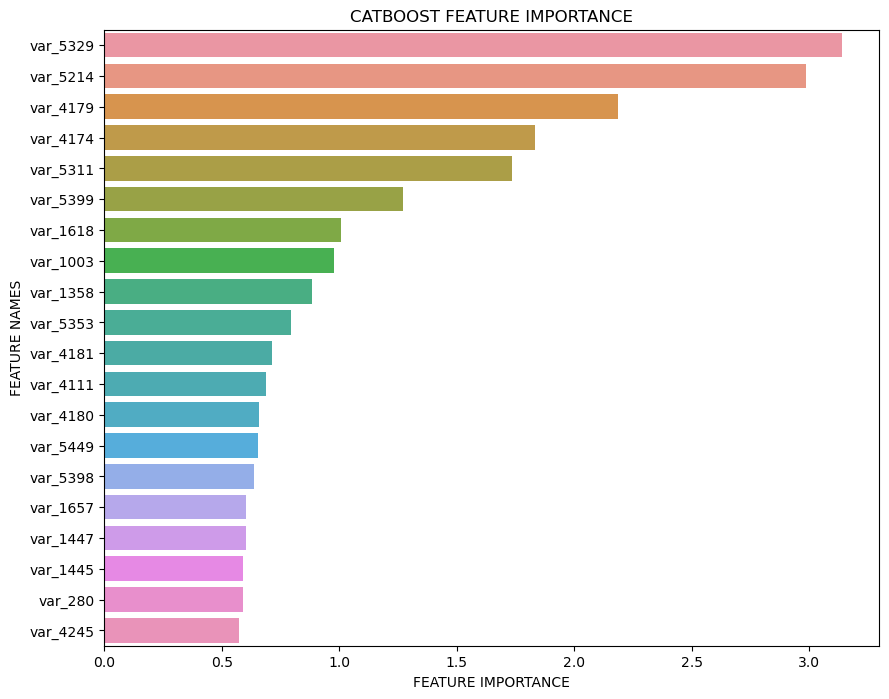

In [58]:
plot_feature_importance(clf.feature_importances_,X_train.columns,'CATBOOST')

* top 20 features for this catboost model

In [59]:
skf = StratifiedKFold(n_splits = SPLITS, shuffle = True, random_state = RANDOM)

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.loc[train_idx], X.loc[test_idx]    
    y_train, y_test = y[train_idx], y[test_idx]    
    clf1 = XGBClassifier(n_estimators = ESTIMATORS,tree_method='gpu_hist')
    clf1.fit(X_train, y_train, eval_set = [(X_test, y_test)], early_stopping_rounds=20, verbose=False)
    preds = clf1.predict_proba(X_test)   
    clfs.append(clf1)
    scores.append(100*roc_auc_score(y_test, preds[:, 1]))
print(f'mean score: {np.mean(scores)}')

mean score: 71.84210840101096


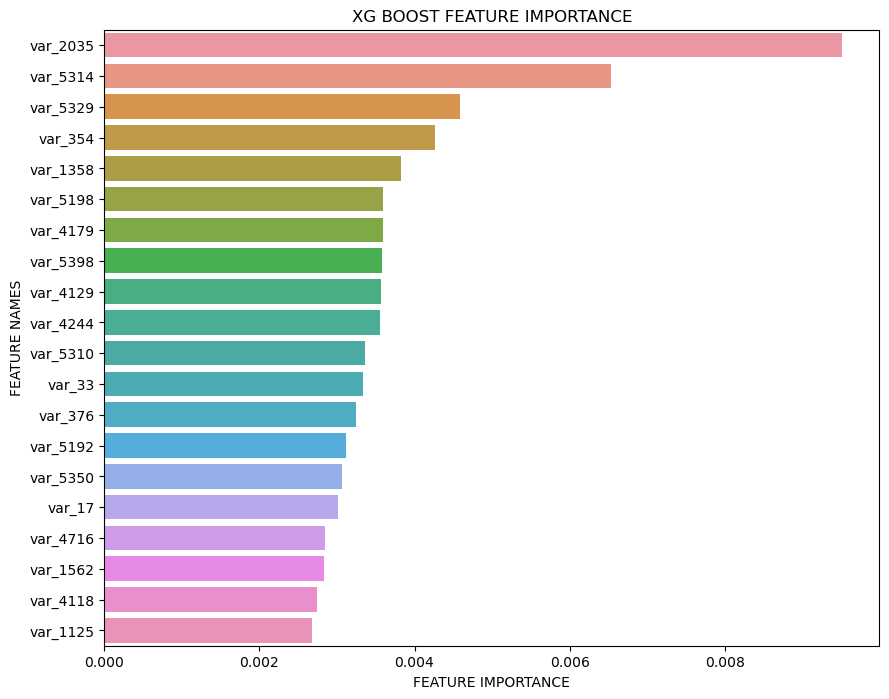

In [60]:
plot_feature_importance(clf1.feature_importances_,X_train.columns,'XG BOOST')

* top 20 features for XG Boost model

In [61]:
skf = StratifiedKFold(n_splits = SPLITS, shuffle = True, random_state = RANDOM)

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.loc[train_idx], X.loc[test_idx]    
    y_train, y_test = y[train_idx], y[test_idx]    
    clf2 = LGBMClassifier(n_estimators = ESTIMATORS,device='gpu')
    clf2.fit(X_train, y_train, eval_set = [(X_test, y_test)],early_stopping_rounds=20, verbose=False)
    preds = clf2.predict_proba(X_test)    
    clfs.append(clf2)
    scores.append(100*roc_auc_score(y_test, preds[:, 1]))
print(f'mean score: {np.mean(scores)}')

mean score: 72.11180220018448


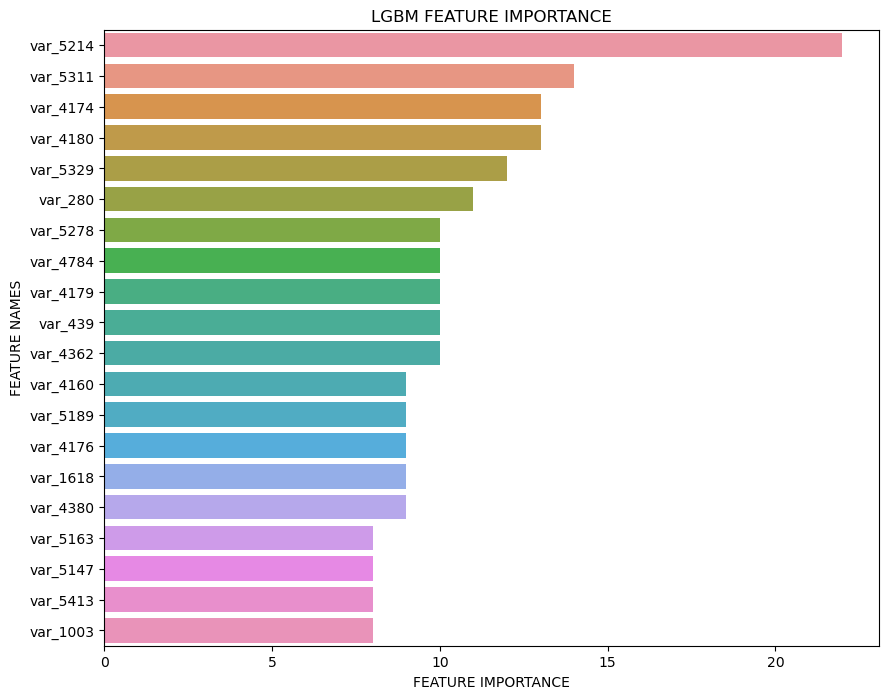

In [62]:
plot_feature_importance(clf2.feature_importances_,X_train.columns,'LGBM')

* top 20 features for this LGBM model

In [63]:
for c in clfs:
    preds = c.predict_proba(test1)
    y_pred.append(preds[:, 1])

In [64]:
final_pred=np.stack(y_pred).mean(0)

In [65]:
final_pred

array([0.49685076, 0.32555725, 0.43056615, ..., 0.57038158, 0.13928889,
       0.2432412 ])

In [66]:
predictions = []
for item in final_pred:
  if item < 0.5:
    predictions.append(0)
  else:
    predictions.append(1)

In [67]:
predictions = np.array(predictions)
type(predictions)

numpy.ndarray

In [68]:
predictions

array([0, 0, 0, ..., 1, 0, 0])

In [69]:
import csv
import random

num_rows = 5000

with open('submissions.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['id', 'predicted', 'predicted_probability'])

    for i in range(num_rows):
        row_id = test['id'][i]
        predicted = predictions[i]
        predicted_probability = final_pred[i]
        writer.writerow([row_id, predicted, predicted_probability])


In [70]:
subs=pd.read_csv('/kaggle/working/submissions.csv')

In [71]:
subs.head()

,id,predicted,predicted_probability
0,id_1,0,0.496851
1,id_2,0,0.325557
2,id_3,0,0.430566
3,id_4,0,0.498914
4,id_5,0,0.147345
